In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\91872\\Desktop\\python files\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


In [3]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\91872\\Desktop\\python files\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [4]:

#Buldiing Model
cnn = tf.keras.models.Sequential()

In [5]:
#Building Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])


In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2486s 1s/step - accuracy: 0.4104 - loss: 2.0874 - val_accuracy: 0.8306 - val_loss: 0.5333
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2438s 1s/step - accuracy: 0.8448 - loss: 0.4840 - val_accuracy: 0.9207 - val_loss: 0.2550
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2453s 1s/step - accuracy: 0.9096 - loss: 0.2821 - val_accuracy: 0.9084 - val_loss: 0.2883
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2480s 1s/step - accuracy: 0.9375 - loss: 0.1907 - val_accuracy: 0.9499 - val_loss: 0.1548
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2438s 1s/step - accuracy: 0.9529 - loss: 0.1430 - val_accuracy: 0.9485 - val_loss: 0.1627
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2471s 1s/step - accuracy: 0.9631 - loss: 0.1140 - val_accuracy: 0.9523 - val_loss: 0.1518
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2465s 1s/step - accuracy: 0.9687 - loss: 0.0954 - val_accuracy: 0.9675 - val_loss: 0.1068
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2545s 1s/step - accuracy: 0.9752 -

In [18]:
# Evaluate the model on the training set
train_loss, train_acc = cnn.evaluate(training_set)

# Print the training accuracy
print('Training accuracy:', train_acc)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 526s 239ms/step - accuracy: 0.9861 - loss: 0.0408
Training accuracy: 0.9875097870826721


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 129s 234ms/step - accuracy: 0.9621 - loss: 0.1322
Validation accuracy: 0.9631231427192688


In [20]:
#Saving the model
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history


{'accuracy': [0.6128458380699158,
  0.8658937215805054,
  0.9164378643035889,
  0.9417739510536194,
  0.9549328088760376,
  0.9650046229362488,
  0.9709083437919617,
  0.9760722517967224,
  0.9795718193054199,
  0.9801550507545471],
 'loss': [1.3120932579040527,
  0.4184570610523224,
  0.2591050863265991,
  0.17707128822803497,
  0.13540291786193848,
  0.1072792261838913,
  0.08927306532859802,
  0.07194863259792328,
  0.0629652813076973,
  0.060461997985839844],
 'val_accuracy': [0.8305827379226685,
  0.9207261800765991,
  0.9083769917488098,
  0.9499203562736511,
  0.9484975934028625,
  0.9523105025291443,
  0.9675050973892212,
  0.9622126221656799,
  0.965228796005249,
  0.9631231427192688],
 'val_loss': [0.5332641005516052,
  0.25496864318847656,
  0.28833258152008057,
  0.1548013687133789,
  0.162714421749115,
  0.15175598859786987,
  0.10681679844856262,
  0.12419132888317108,
  0.12445010244846344,
  0.1293988972902298]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


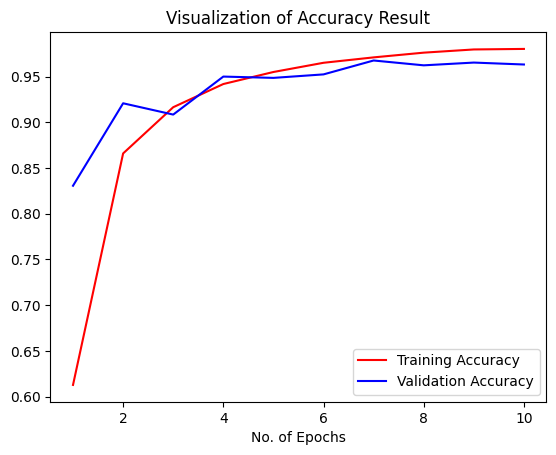

In [24]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()



In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
   "C:\\Users\\91872\\Desktop\\python files\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 338s 19ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.94      0.95       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.90      0.99      0.94       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.98      0.

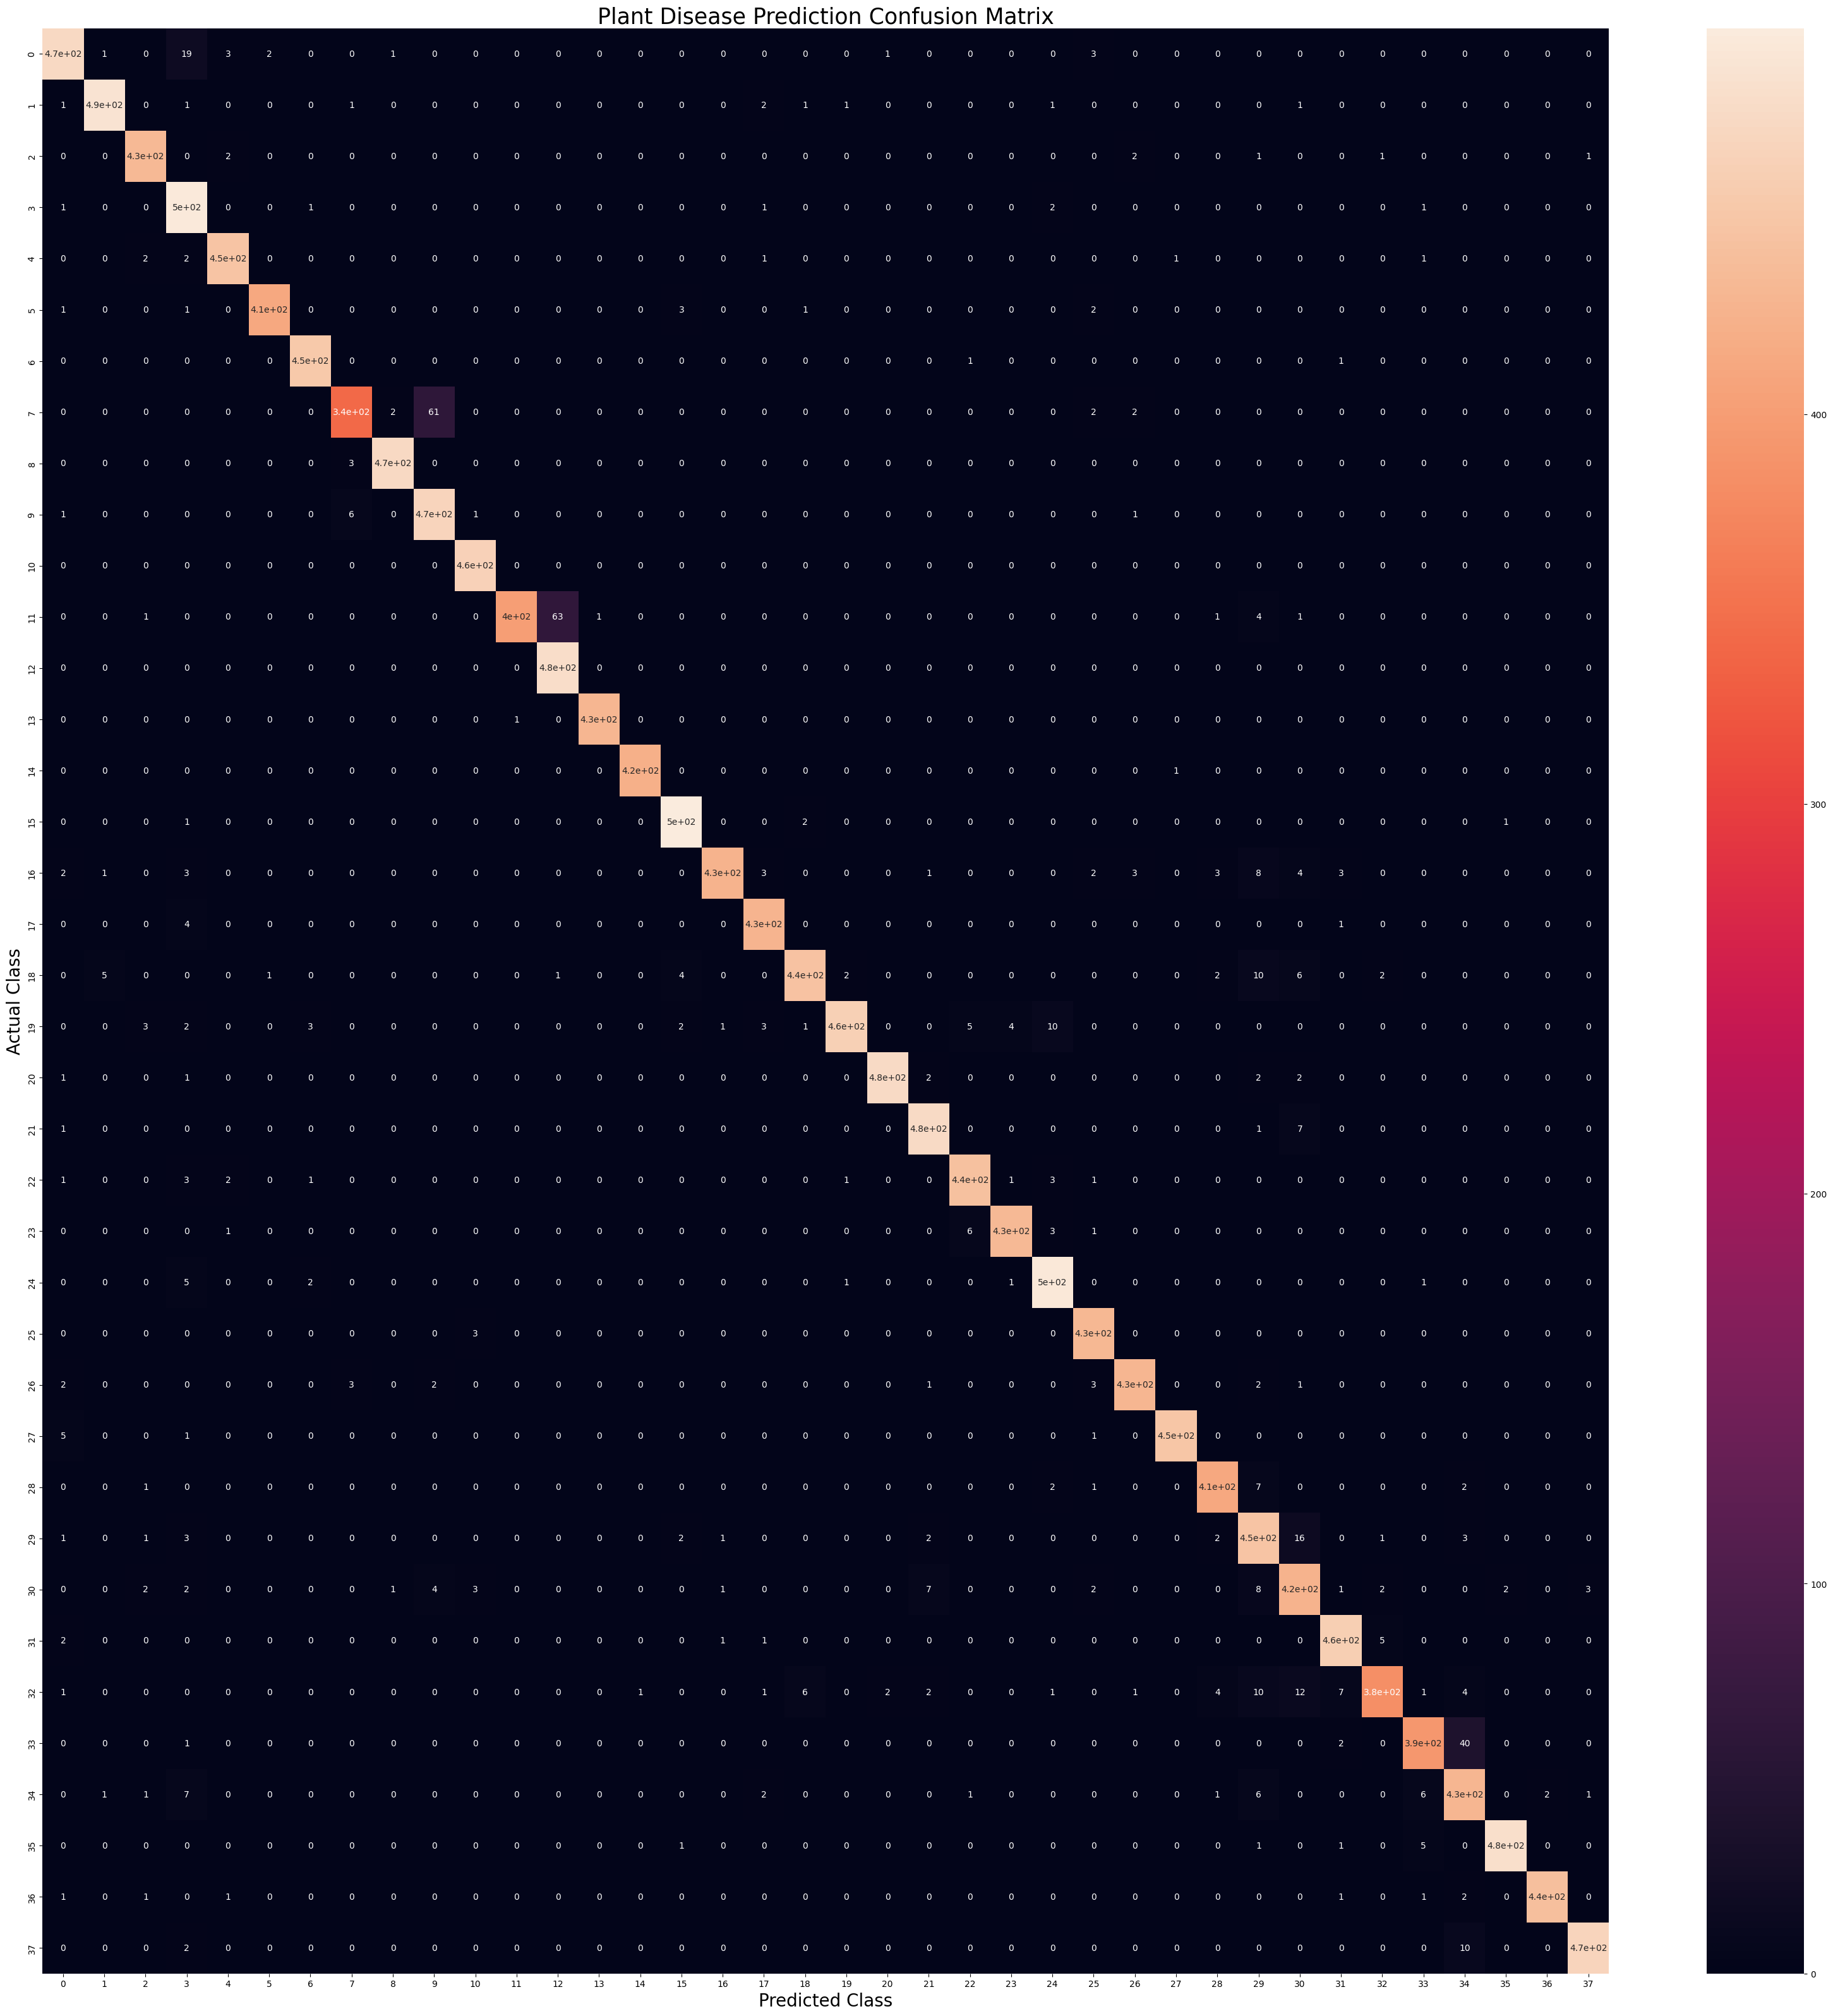

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

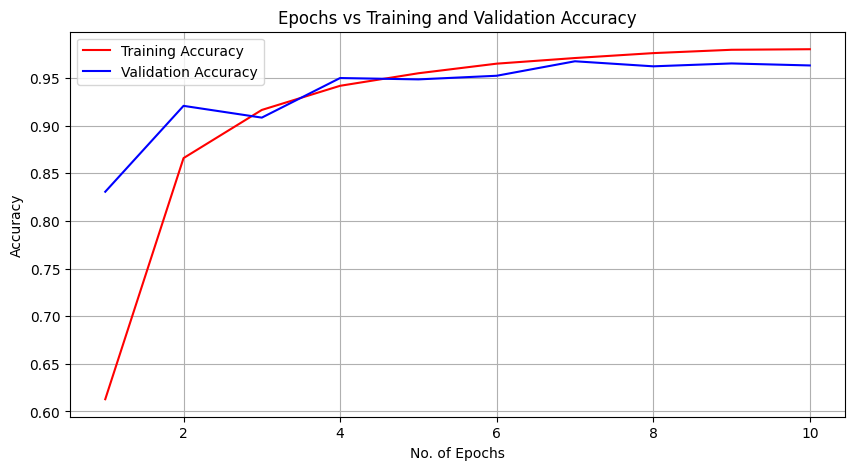

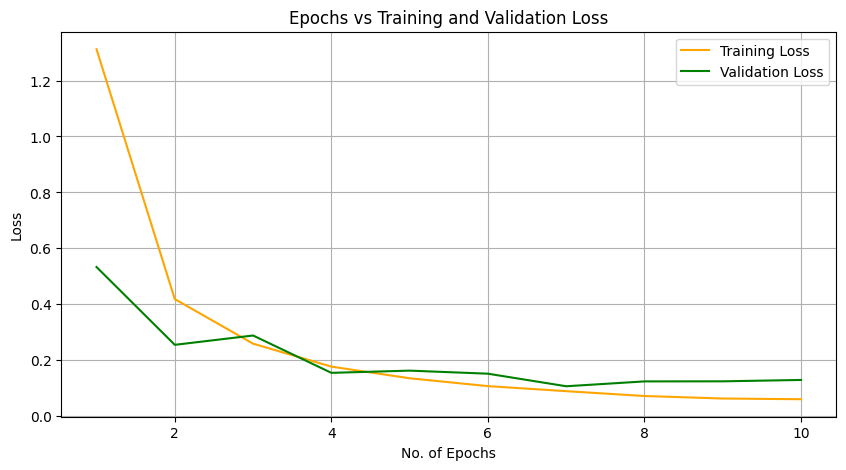

In [34]:
import matplotlib.pyplot as plt

# Assuming 'training_history' is the variable containing the training history
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]

# Plot for Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_history.history['loss'], color='orange', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
from sklearn.metrics import classification_report

# Replace these with your actual data
# Y_true: Ground truth labels (1D array or list)
# predicted_categories: Predicted labels from your model (1D array or list)
# class_name: List of class names (corresponding to labels)

# Example:
# Y_true = [0, 1, 2, 0, 1, 2, ...]
# predicted_categories = [0, 1, 1, 0, 2, 2, ...]
# class_name = ["Class1", "Class2", "Class3", ...]

# Generate the classification report
report = classification_report(Y_true, predicted_categories, target_names=class_name, digits=4)

# Print the classification report
print("Classification Report:\n")
print(report)


Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     0.9576    0.9405    0.9489       504
                                 Apple___Black_rot     0.9839    0.9819    0.9829       497
                          Apple___Cedar_apple_rust     0.9730    0.9841    0.9785       440
                                   Apple___healthy     0.8953    0.9880    0.9394       502
                               Blueberry___healthy     0.9803    0.9846    0.9824       454
          Cherry_(including_sour)___Powdery_mildew     0.9928    0.9810    0.9869       421
                 Cherry_(including_sour)___healthy     0.9848    0.9956    0.9902       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.9635    0.8366    0.8956       410
                       Corn_(maize)___Common_rust_     0.9916    0.9937    0.9927       477
               Corn_(maize)___Northern_Leaf_Blight     

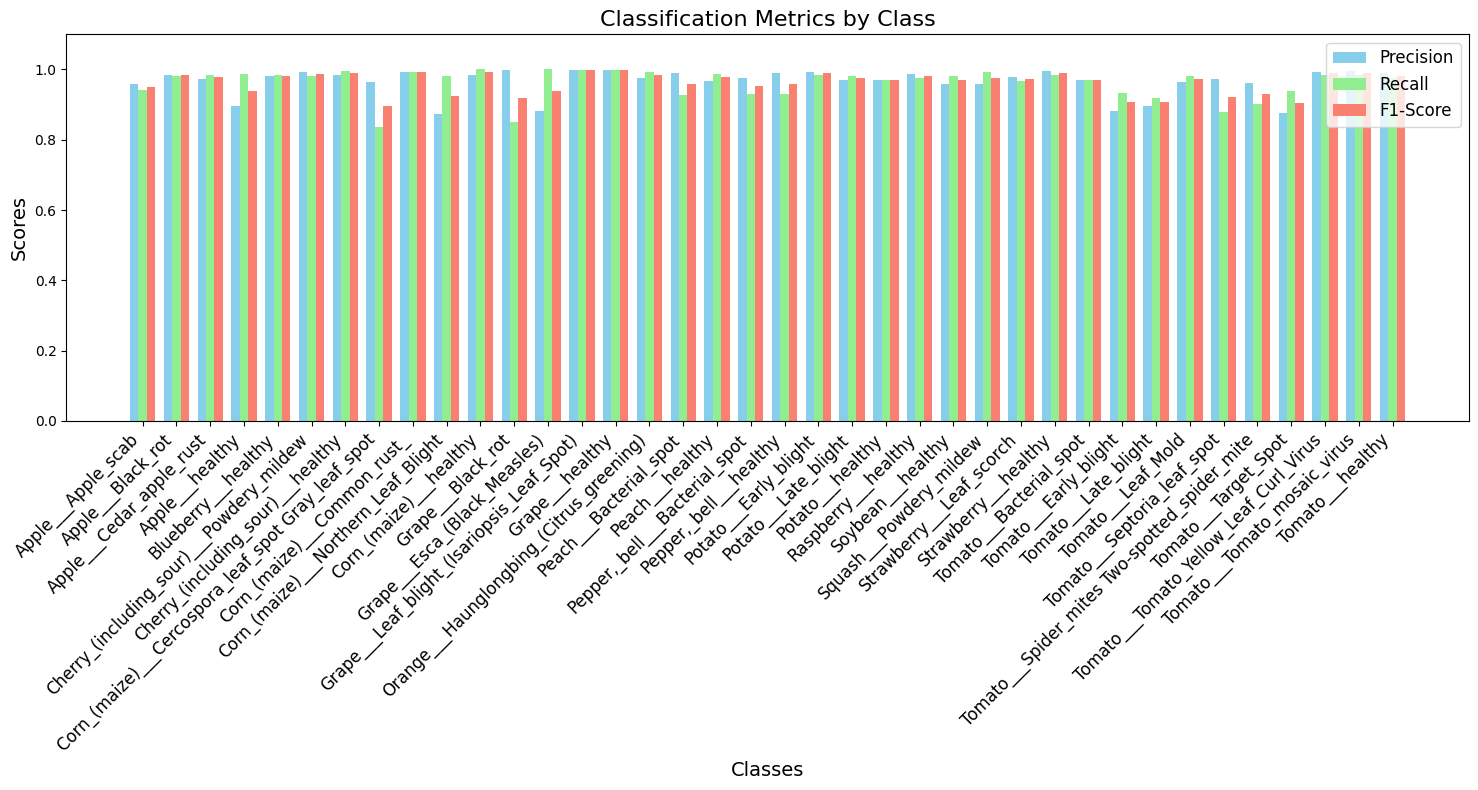

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Example data (replace with your real data)
# Y_true: Ground truth labels
# predicted_categories: Predicted labels
# class_name: List of class names
# Example:
# Y_true = [0, 1, 2, 0, 1, 2, ...]
# predicted_categories = [0, 1, 1, 0, 2, 2, ...]
# class_name = ["Class1", "Class2", "Class3", ...]

# Get the classification report as a dictionary
report_dict = classification_report(
    Y_true, predicted_categories, target_names=class_name, output_dict=True
)

# Extract metrics for each class
classes = list(report_dict.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report_dict[cls]['precision'] for cls in classes]
recall = [report_dict[cls]['recall'] for cls in classes]
f1_score = [report_dict[cls]['f1-score'] for cls in classes]

# Bar width and X-axis positions
bar_width = 0.25
x = np.arange(len(classes))

# Create the plot
plt.figure(figsize=(15, 8))
plt.bar(x - bar_width, precision, width=bar_width, label='Precision', color='skyblue')
plt.bar(x, recall, width=bar_width, label='Recall', color='lightgreen')
plt.bar(x + bar_width, f1_score, width=bar_width, label='F1-Score', color='salmon')

# Add labels, title, and legend
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Classification Metrics by Class', fontsize=16)
plt.xticks(x, classes, rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1.1)  # Set y-axis limit to 1.1
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
